<a href="https://colab.research.google.com/github/commandermaks/Mchine-learning/blob/Soft-computing/119CS0504_A2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

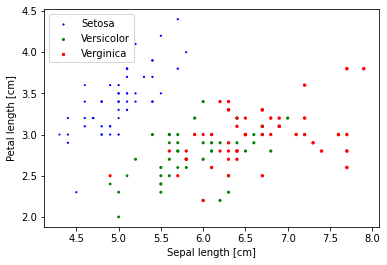

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

data = load_iris()
x = data.data
y = data.target
plt.scatter(x[:50, 0], x[:50, 1], x[:50, 2],
            color='blue', marker='o', label='Setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], x[50:100, 2],
            color='green', marker='o', label='Versicolor')
plt.scatter(x[100:150, 0], x[100:150, 1], x[100:150, 2],
            color='red', marker='o', label='Verginica')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.show()

In [ ]:
c1 = np.random.random()
c1 = round(c1*50)
c2 = np.random.random()
c2 = round(c2*50+50)
c3 = np.random.random()
c3 = round(c3*50+100)
print(c1,c2,c3)
print(x[c1],x[c2],x[c3])



32 80 109
[5.2 4.1 1.5 0.1] [5.5 2.4 3.8 1.1] [7.2 3.6 6.1 2.5]


In [ ]:
cluster_weights = []
for i in x:
    temp = []
    rand_int1 = np.random.random()
    rand_int1 = round(rand_int1*70)/100
    rand_int2 = np.random.random()
    rand_int2 = round(rand_int2*70)/100
    rand_int3 = 0
    if(rand_int1+rand_int2>=1):
        rand_int1=rand_int1/2
        rand_int2=rand_int2/2
        rand_int3=1-rand_int1-rand_int2
    else:
        rand_int3=1-rand_int1-rand_int2
    temp.append(rand_int1)
    temp.append(rand_int2)
    temp.append(rand_int3)
    cluster_weights.append(temp)
print(cluster_weights)

[[0.31, 0.6, 0.08999999999999997], [0.52, 0.33, 0.14999999999999997], [0.13, 0.48, 0.39], [0.235, 0.325, 0.44], [0.13, 0.62, 0.25], [0.4, 0.0, 0.6], [0.07, 0.5, 0.42999999999999994], [0.255, 0.33, 0.415], [0.18, 0.32, 0.5], [0.285, 0.34, 0.37500000000000006], [0.54, 0.08, 0.37999999999999995], [0.43, 0.03, 0.54], [0.6, 0.31, 0.09000000000000002], [0.21, 0.09, 0.7000000000000001], [0.37, 0.34, 0.29], [0.41, 0.21, 0.3800000000000001], [0.6, 0.36, 0.040000000000000036], [0.07, 0.33, 0.5999999999999999], [0.37, 0.44, 0.19], [0.22, 0.33, 0.45], [0.47, 0.05, 0.48000000000000004], [0.37, 0.19, 0.44], [0.61, 0.3, 0.09000000000000002], [0.42, 0.16, 0.42000000000000004], [0.04, 0.57, 0.39], [0.175, 0.33, 0.49499999999999994], [0.24, 0.28, 0.48], [0.02, 0.62, 0.36], [0.285, 0.24, 0.4750000000000001], [0.46, 0.09, 0.45000000000000007], [0.25, 0.06, 0.69], [0.29, 0.285, 0.425], [0.33, 0.23, 0.43999999999999995], [0.02, 0.48, 0.5], [0.275, 0.33, 0.39499999999999996], [0.3, 0.33, 0.36999999999999994]

In [ ]:
def dist(a,b):
    return (a[0]-b[0])**2 + (a[1]-b[1])**2 + (a[2]-b[2])**2 + (a[3]-b[3])**2

m = 3

objective = 0

count = 0
for i in x:
    dist1 = dist(i,x[c1])
    dist2 = dist(i,x[c2])
    dist3 = dist(i,x[c3])
    objective += (cluster_weights[count][0]**m)*dist1 + (cluster_weights[count][1]**m)*dist2 + (cluster_weights[count][2]**m)*dist3
    count +=1

for i in range(50):
    weighted_sum_w1 = [0,0,0,0]
    weighted_sum_w2 = [0,0,0,0]
    weighted_sum_w3 = [0,0,0,0]
    sum_w1 = 0
    sum_w2 = 0
    sum_w3 = 0

    count = 0
    for i in x:
        weighted_sum_w1 = weighted_sum_w1 + (cluster_weights[count][0]**m)*i
        weighted_sum_w2 = weighted_sum_w2 + (cluster_weights[count][1]**m)*i
        weighted_sum_w3 = weighted_sum_w3 + (cluster_weights[count][2]**m)*i

        sum_w1 = sum_w1 + cluster_weights[count][0]**m
        sum_w2 = sum_w2 + cluster_weights[count][1]**m
        sum_w3 = sum_w3 + cluster_weights[count][2]**m
        count = count + 1

    predicted_c1 = weighted_sum_w1/sum_w1
    predicted_c2 = weighted_sum_w2/sum_w2
    predicted_c3 = weighted_sum_w3/sum_w3

    new_weights = []
    for i in x:
        temp = []
        new_weight1 = 0
        new_weight2 = 0
        new_weight3 = 0
        new_weight1 = (dist(i,predicted_c1)/dist(i,predicted_c1))**(2/(m-1)) + (dist(i,predicted_c1)/dist(i,predicted_c2))**(2/(m-1)) + (dist(i,predicted_c1)/dist(i,predicted_c3))**(2/(m-1))

        new_weight2 = (dist(i,predicted_c2)/dist(i,predicted_c1))**(2/(m-1)) + (dist(i,predicted_c2)/dist(i,predicted_c2))**(2/(m-1)) + (dist(i,predicted_c2)/dist(i,predicted_c3))**(2/(m-1))

        new_weight3 = (dist(i,predicted_c3)/dist(i,predicted_c1))**(2/(m-1)) + (dist(i,predicted_c3)/dist(i,predicted_c2))**(2/(m-1)) + (dist(i,predicted_c3)/dist(i,predicted_c3))**(2/(m-1))
        temp.append(1/new_weight1)
        temp.append(1/new_weight2)
        temp.append(1/new_weight3)
        new_weights.append(temp)

    count = 0
    new_objective = 0
    for i in x:
        dist1 = dist(i,predicted_c1)
        dist2 = dist(i,predicted_c2)
        dist3 = dist(i,predicted_c3)

        new_objective += (new_weights[count][0]**m)*dist1 + (new_weights[count][1]**m)*dist2 + (new_weights[count][2]**m)*dist3
        count +=1
    if(new_objective<objective):
        cluster_weights = new_weights




[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


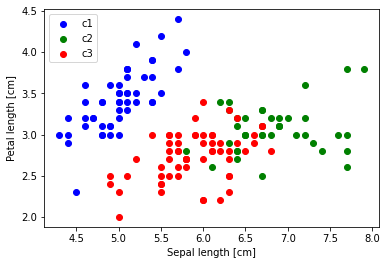

In [ ]:
predicted_y = []

for i in cluster_weights:
    maxi = np.fmax(np.fmax(i[0],i[1]),i[2])
    if(maxi == i[0]):
        predicted_y.append(0)
    elif(maxi == i[1]):
        predicted_y.append(1)
    elif(maxi == i[2]):
        predicted_y.append(2)
print(predicted_y)
print(y)
c1 = []
c2 = []
c3 = []
count = 0
for i in predicted_y:
    if(i==0):
        c1.append(x[count])
    elif(i==1):
        c2.append(x[count])
    elif(i==2):
        c3.append(x[count])
    count +=1

temp1 = []
temp2 = []
for i in range(len(c1)):
    temp1.append(c1[i][0])
    temp2.append(c1[i][1])

plt.scatter(temp1, temp2,
            color='blue', marker='o', label='c1')
temp1 = []
temp2 = []
for i in range(len(c2)):
    temp1.append(c2[i][0])
    temp2.append(c2[i][1])
plt.scatter(temp1,temp2,
            color='green', marker='o', label='c2')
temp1 = []
temp2 = []
for i in range(len(c3)):
    temp1.append(c3[i][0])
    temp2.append(c3[i][1])
plt.scatter(temp1, temp2,
            color='red', marker='o', label='c3')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.show()